In [21]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('investor_profiles.csv')
df.head()

,age,income_band,financial_knowledge,investment_experience,risk_preference,loss_aversion,investment_horizon_years,primary_goal,risk_profile
0,39,Medium,Low,Basic,Avoid risk,Very uncomfortable with losses,10,Aggressive growth,Conservative
1,33,Low,Medium,No experience,Avoid risk,Can accept small losses,5,Capital preservation,Conservative
2,41,Medium,Medium,No experience,Comfortable with some risk,Very uncomfortable with losses,5,Aggressive growth,Conservative
3,50,Medium,Medium,No experience,Comfortable with high risk,Can accept small losses,5,Capital preservation,Conservative
4,32,High,Medium,Advanced,Comfortable with some risk,Can accept small losses,15,Balanced growth,Moderate


In [23]:
df.shape

(5000, 9)

In [24]:
df.duplicated().sum()

np.int64(244)

In [25]:
df[df.duplicated()]

,age,income_band,financial_knowledge,investment_experience,risk_preference,loss_aversion,investment_horizon_years,primary_goal,risk_profile
115,38,Low,Medium,Basic,Comfortable with some risk,Can accept small losses,7,Balanced growth,Conservative
153,37,Medium,Medium,No experience,Comfortable with some risk,Very uncomfortable with losses,10,Aggressive growth,Moderate
157,39,Medium,Medium,No experience,Comfortable with some risk,Can accept small losses,10,Aggressive growth,Moderate
251,44,Medium,High,Basic,Comfortable with some risk,Can accept small losses,10,Capital preservation,Moderate
285,20,Medium,Medium,Basic,Comfortable with some risk,Can accept small losses,10,Aggressive growth,Moderate
...,...,...,...,...,...,...,...,...,...
4968,32,Medium,Medium,Basic,Comfortable with high risk,Can accept large swings,5,Balanced growth,Moderate
4974,20,Medium,High,Advanced,Comfortable with high risk,Can accept large swings,10,Aggressive growth,Aggressive
4977,36,Medium,High,Basic,Comfortable with some risk,Very uncomfortable with losses,10,Aggressive growth,Moderate
4984,40,Low,High,No experience,Comfortable with some risk,Can accept large swings,7,Balanced growth,Moderate


In [26]:
df[df.duplicated(keep=False)].sort_values(list(df.columns))

,age,income_band,financial_knowledge,investment_experience,risk_preference,loss_aversion,investment_horizon_years,primary_goal,risk_profile
2571,20,Low,High,Advanced,Comfortable with high risk,Very uncomfortable with losses,20,Aggressive growth,Aggressive
3657,20,Low,High,Advanced,Comfortable with high risk,Very uncomfortable with losses,20,Aggressive growth,Aggressive
4485,20,Low,High,No experience,Comfortable with some risk,Can accept small losses,20,Balanced growth,Moderate
4850,20,Low,High,No experience,Comfortable with some risk,Can accept small losses,20,Balanced growth,Moderate
1061,20,Low,Low,Advanced,Comfortable with some risk,Can accept large swings,10,Capital preservation,Moderate
...,...,...,...,...,...,...,...,...,...
1078,50,Medium,Medium,Advanced,Comfortable with some risk,Can accept small losses,10,Aggressive growth,Moderate
3523,51,Medium,Medium,Advanced,Avoid risk,Can accept small losses,5,Balanced growth,Conservative
3998,51,Medium,Medium,Advanced,Avoid risk,Can accept small losses,5,Balanced growth,Conservative
1024,52,High,Medium,Basic,Avoid risk,Very uncomfortable with losses,3,Capital preservation,Conservative


In [27]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [28]:
df.isnull().sum()

age                         0
income_band                 0
financial_knowledge         0
investment_experience       0
risk_preference             0
loss_aversion               0
investment_horizon_years    0
primary_goal                0
risk_profile                0
dtype: int64

In [29]:
df.dtypes

age                          int64
income_band                 object
financial_knowledge         object
investment_experience       object
risk_preference             object
loss_aversion               object
investment_horizon_years     int64
primary_goal                object
risk_profile                object
dtype: object

In [30]:
for col in df.columns:
    print(col, df[col].unique()[:10])

age [39 33 41 50 32 42 30 40 37 20]
income_band ['Medium' 'Low' 'High']
financial_knowledge ['Low' 'Medium' 'High']
investment_experience ['Basic' 'No experience' 'Advanced']
risk_preference ['Avoid risk' 'Comfortable with some risk' 'Comfortable with high risk']
loss_aversion ['Very uncomfortable with losses' 'Can accept small losses'
 'Can accept large swings']
investment_horizon_years [10  5 15  7 12 25 20  3  1]
primary_goal ['Aggressive growth' 'Capital preservation' 'Balanced growth']
risk_profile ['Conservative' 'Moderate' 'Aggressive']


In [31]:
df["risk_profile"].value_counts()
df["risk_profile"].value_counts(normalize=True)

risk_profile
Moderate        0.615013
Conservative    0.292052
Aggressive      0.092935
Name: proportion, dtype: float64

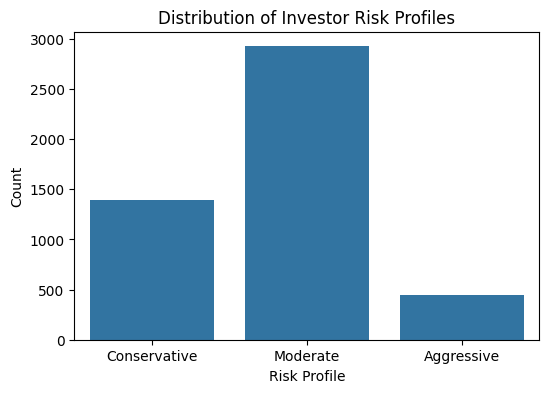

In [32]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="risk_profile", order=["Conservative", "Moderate", "Aggressive"])
plt.title("Distribution of Investor Risk Profiles")
plt.xlabel("Risk Profile")
plt.ylabel("Count")
plt.show()

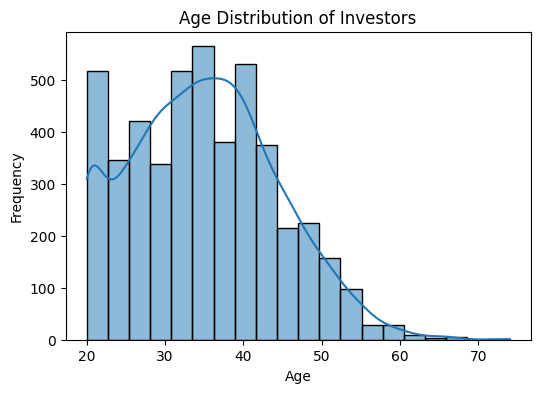

In [33]:
plt.figure(figsize=(6,4))
sns.histplot(df["age"], kde=True, bins=20)
plt.title("Age Distribution of Investors")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

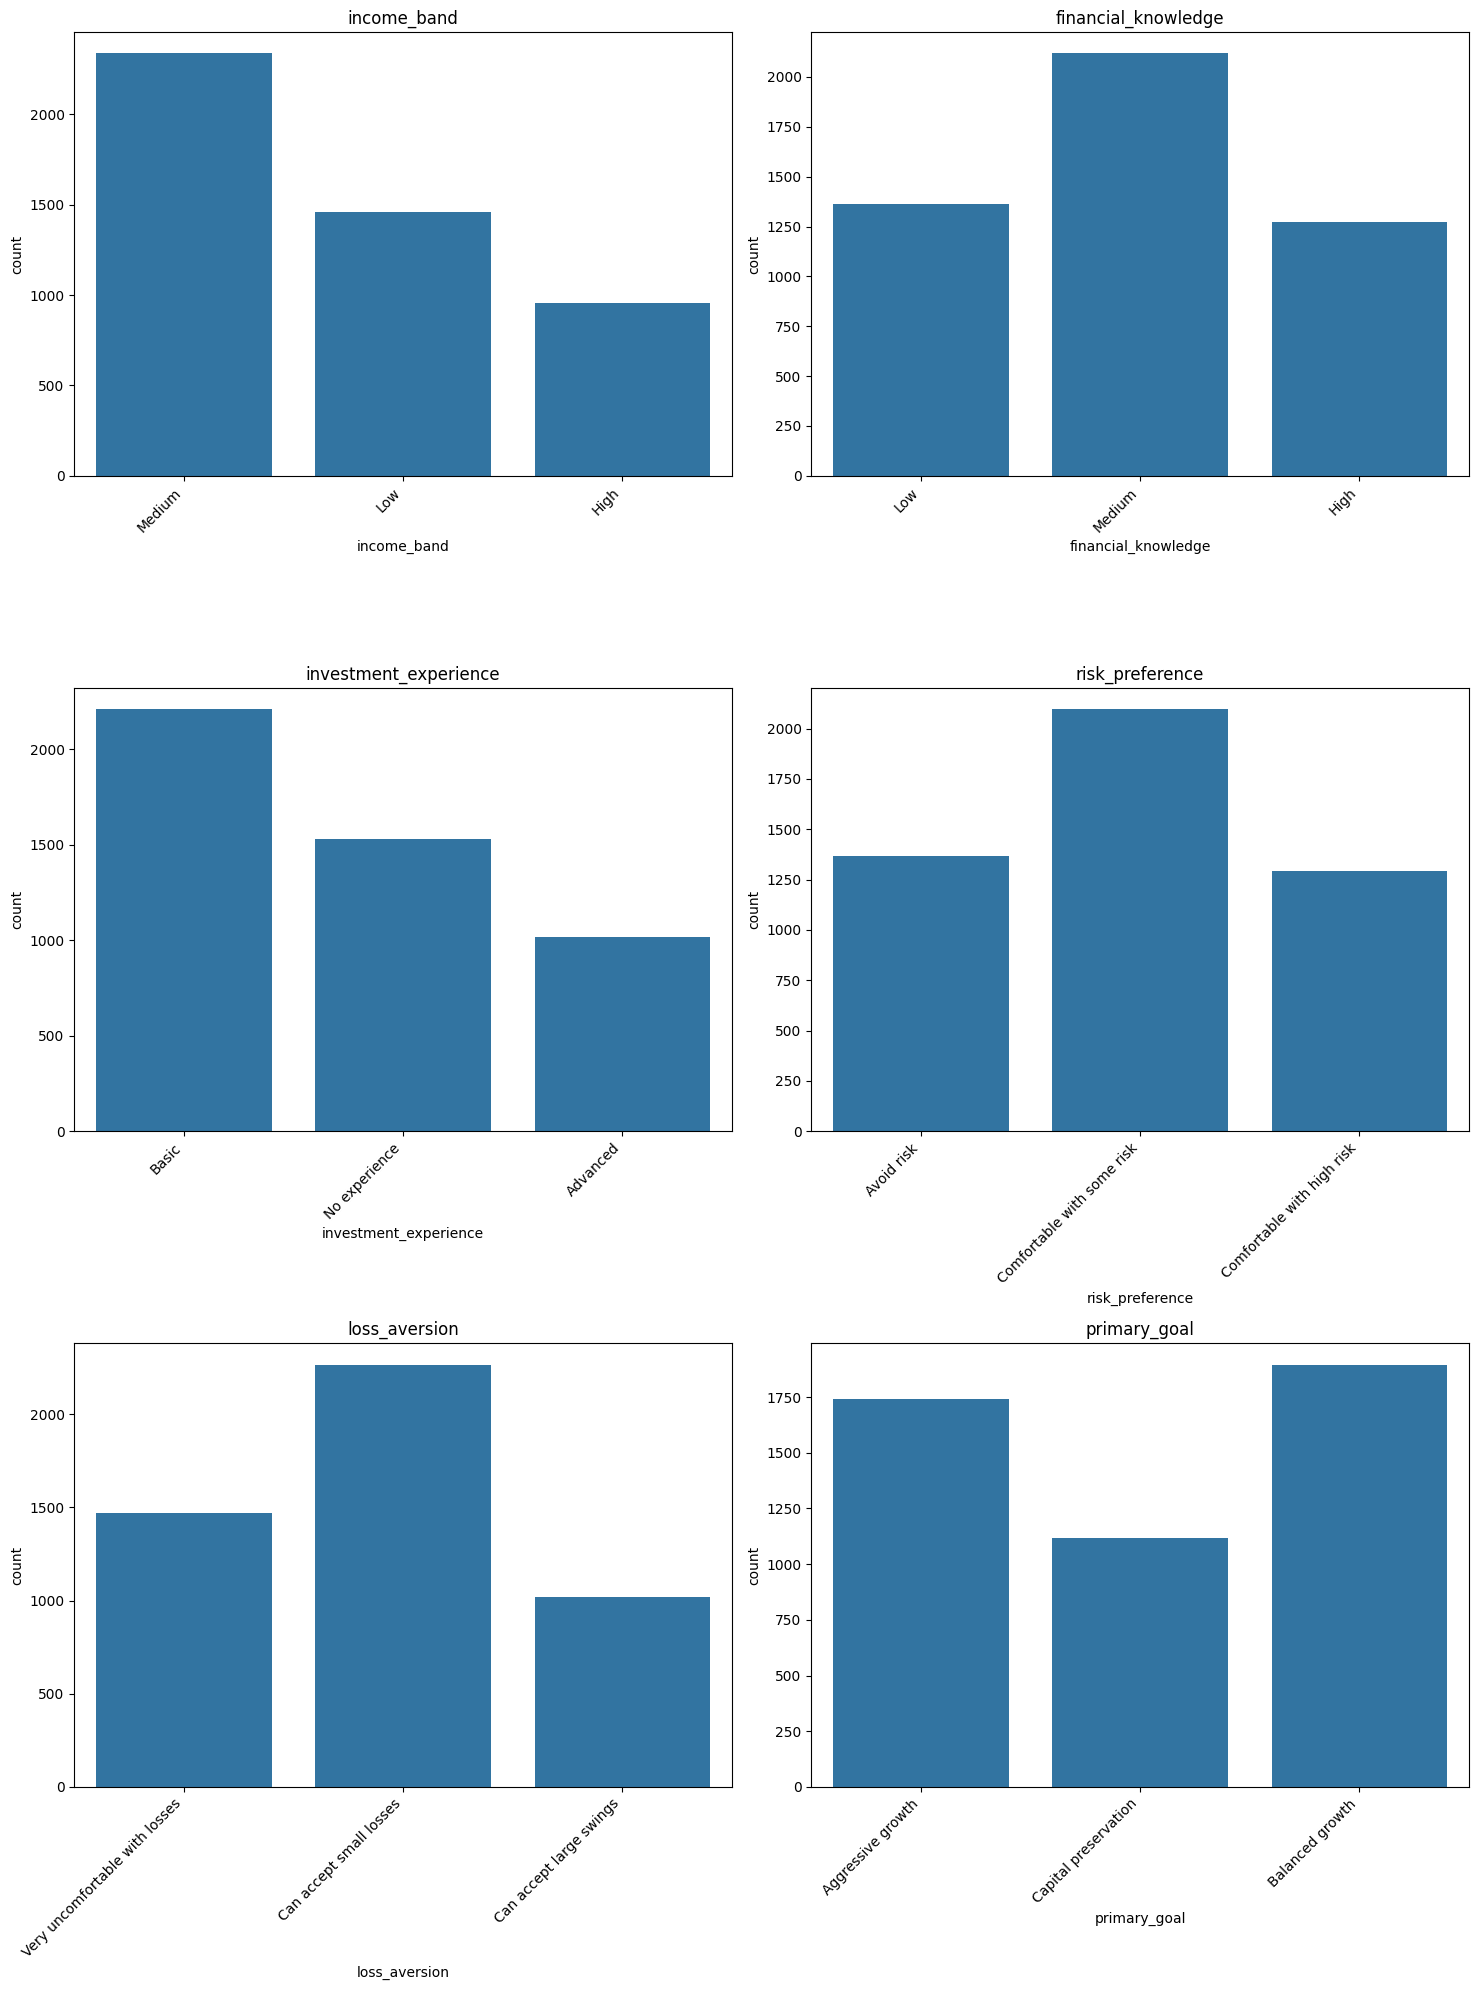

In [34]:
categorical_cols = [
    "income_band",
    "financial_knowledge",
    "investment_experience",
    "risk_preference",
    "loss_aversion",
    "primary_goal"
]

plt.figure(figsize=(15,20))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45, ha="right")
    plt.title(col)
plt.tight_layout()
plt.show()

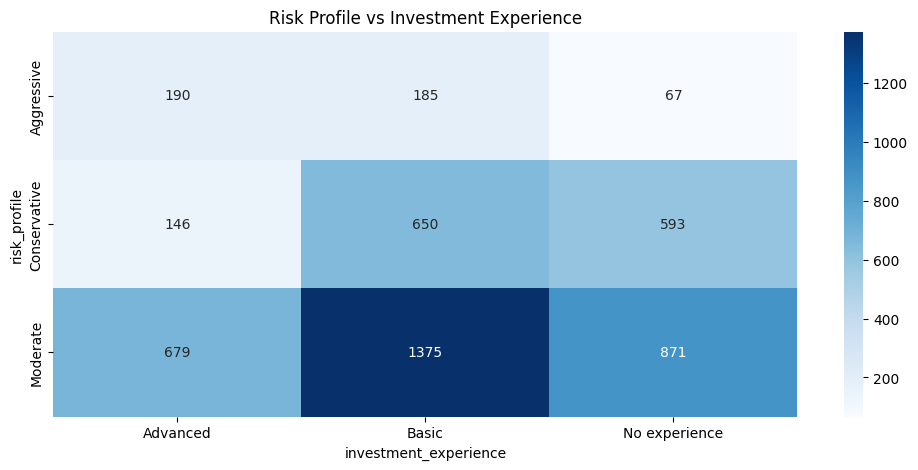

In [35]:
plt.figure(figsize=(12,5))
sns.heatmap(pd.crosstab(df["risk_profile"], df["investment_experience"]), annot=True, fmt="d", cmap="Blues")
plt.title("Risk Profile vs Investment Experience")
plt.show()

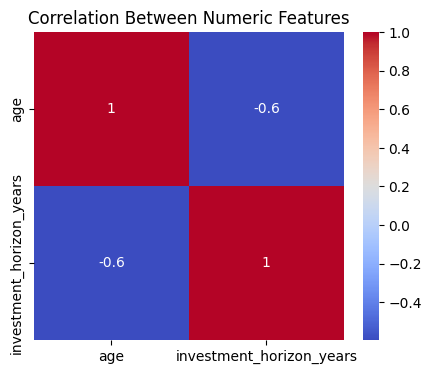

In [36]:
numeric_cols = ["age", "investment_horizon_years"]

plt.figure(figsize=(5,4))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Numeric Features")
plt.show()

In [37]:
df.to_csv("investor_profiles_cleaned.csv", index=False)
print("Clean file saved.")

Clean file saved.
